<a href="https://colab.research.google.com/github/SachinScaler/IntroToML-NN_Dec23/blob/main/Copy_of_PostRead_LogsiticRegression01_ScratchImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Scratch implementation of LogisticRegression

Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

defining Model and sigmoid function

In [ ]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def predict(X,weight):
    """
    X - np array (m,n)
   weight - np arrary (n, 1)
    """

    # same as Linear Model y = w^T + w0
    y = np.dot(X, weight)

    # Only for p_i in Logistic Regression, sigmoid is needed
    pi = sigmoid(y)
    return pi


LogLoss function

In [ ]:
def error(X, y, weight):
    """
    params:
        X - np array (m,n)
        y - np array (m,1)
        weight - np arrary (n,1)

    return :
        scalar value = loss value
    """
    pi = predict(X, weight)

    # Finds the LogLoss
    Loss = -1 * (np.mean((y*np.log(pi) + (1-y)*np.log(1 - pi))) )

    return Loss



Optimisation using Gradient descent

In [ ]:
def gradient(X, y, weight):
    """
    X - (m,n)
    y - (m,1)
    weight - (n,1)

    return - (n, 1)
    """
    pi = predict(X, weight)

    # Gradient (1/n)*(p-y)*x
    grad = (np.dot(X.T, (pi - y)))
    return grad/X.shape[0]

Performing Gradient Descent for 30 epochs with ```lr=0.5```

In [ ]:
def gradient_descent(X, y, lr = 0.5, epochs = 30):

    weight = np.zeros((X.shape[1], 1))
    error_list = []

    for _ in range(epochs):

        # Finds LogLoss same as how Linear Regression find MSE
        loss = error(X, y, weight)
        error_list.append(loss)

        # Computes gradient
        grad = gradient(X, y, weight)

        #Update Rule
        weight = weight - lr*grad

    return weight, error_list



Creating some data for simplicity
- Since real world problems are more tricky and lots of EDA are required

In [ ]:
##dataset creation
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=5)
#converting row vector to column vector
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(500, 2) (500, 1)


Weights of the model

In [ ]:
weight = np.zeros((X.shape[1], 1))
weight

array([[0.],
       [0.]])

Plotting the data

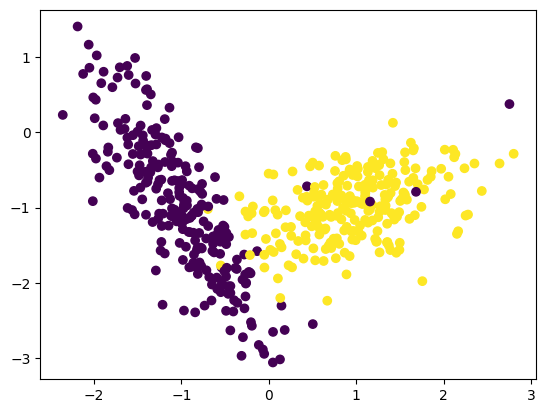

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()


Adding bias term

In [ ]:
ones= np.ones((500,1))
X_ = np.hstack((ones, X))
X_[:5]
X_.shape

(500, 3)

Splitting the data into train and test
- To test the model on unseen data

In [ ]:
from sklearn.model_selection import train_test_split


# reserving 20% of the data for testing purposes
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42)


Train the model

In [ ]:
opt_weight, error_list = gradient_descent(X_train, y_train)

Checking the learned parameters and loss

In [ ]:
##learned parameters
opt_weight

array([[0.11877655],
       [2.30509204],
       [0.11405031]])

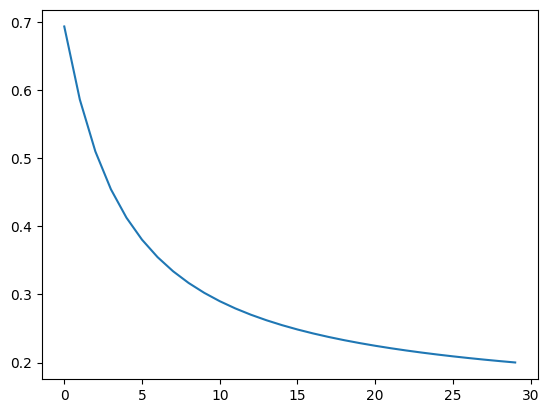

In [ ]:
plt.plot(error_list)

Plotting the Hyperplane that best separates the original data

In [ ]:
##generating points to plot the learned line
x1 = np.array([-1,1])
x2 = - (opt_weight[0] + opt_weight[1]*x1) / opt_weight[2]
print(x2)

[ 19.16974639 -21.25262639]


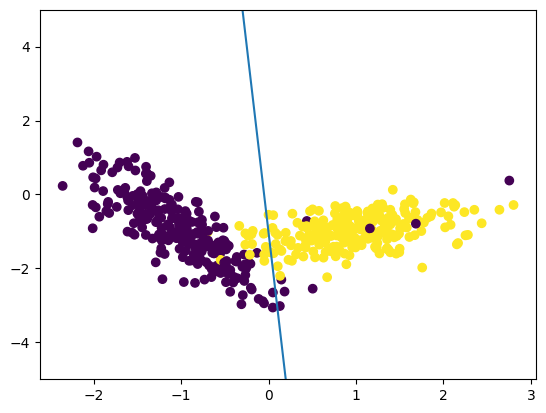

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.ylim((-5,5))
plt.plot(x1, x2)
plt.show()



**observe**

The hyperplane does separates most of the data correctly
- But still there are few datapoints which are misclassified

